# Stroke Prediction Dataset Test

This notebook tests the download and loading of the Stroke Prediction dataset from Kaggle.

In [1]:
# Install required packages
!pip install kagglehub pandas matplotlib seaborn

In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

# Download the dataset to current directory
print("Downloading Stroke Prediction dataset...")
cache_path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

# Copy to current folder
current_dir = os.getcwd()
local_data_dir = current_dir
os.makedirs(local_data_dir, exist_ok=True)

# Copy files from cache to local directory
for file in os.listdir(cache_path):
    src = os.path.join(cache_path, file)
    dst = os.path.join(local_data_dir, file)
    shutil.copy2(src, dst)
    print(f"Copied {file} to local data folder")

path = local_data_dir
print(f"Dataset available locally at: {path}")

/home/tamim/ai4ph/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 67.4k/67.4k [00:00<00:00, 111kB/s]

Extracting files...
Copied healthcare-dataset-stroke-data.csv to local data folder
Dataset available locally at: /home/tamim/ai4ph/data/stroke_prediction


In [3]:
# Load and explore the data
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    df = pd.read_csv(os.path.join(path, csv_files[0]))
    
    print(f"Dataset shape: {df.shape}")
    print(f"\nColumns: {list(df.columns)}")
    print(f"\nFirst 5 rows:\n{df.head()}")
    
    # Check target variable
    if 'stroke' in df.columns:
        print(f"\nStroke distribution:")
        print(df['stroke'].value_counts())
        print(f"Stroke rate: {df['stroke'].mean()*100:.2f}%")
    
    # Basic statistics
    print(f"\nBasic statistics:\n{df.describe()}")

Dataset shape: (5110, 12)

Columns: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

First 5 rows:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smoke

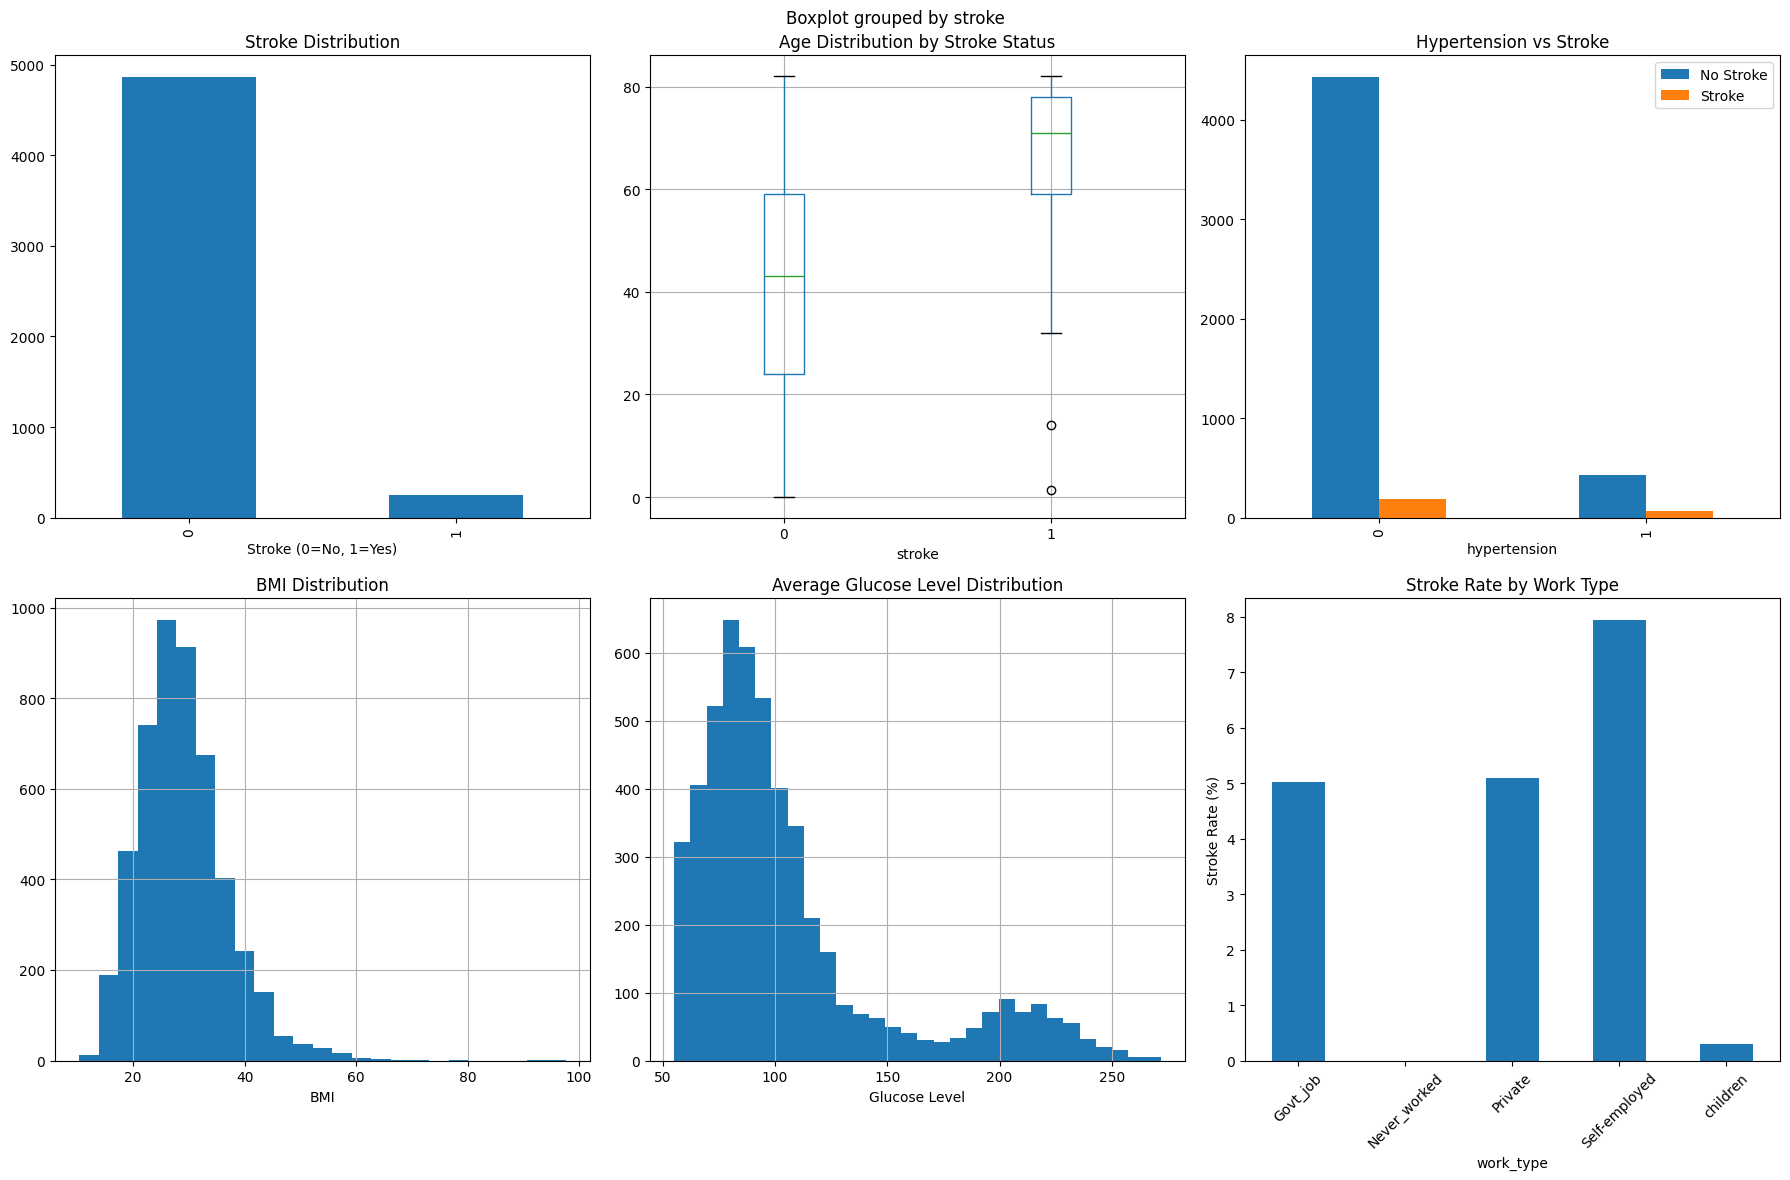

In [4]:
# Create stroke risk factor visualizations
if csv_files and len(df) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    # Stroke distribution
    if 'stroke' in df.columns:
        df['stroke'].value_counts().plot(kind='bar', ax=axes[0])
        axes[0].set_title('Stroke Distribution')
        axes[0].set_xlabel('Stroke (0=No, 1=Yes)')
    
    # Age distribution by stroke
    if 'age' in df.columns and 'stroke' in df.columns:
        df.boxplot(column='age', by='stroke', ax=axes[1])
        axes[1].set_title('Age Distribution by Stroke Status')
    
    # Hypertension and stroke
    if 'hypertension' in df.columns and 'stroke' in df.columns:
        cross_tab = pd.crosstab(df['hypertension'], df['stroke'])
        cross_tab.plot(kind='bar', ax=axes[2])
        axes[2].set_title('Hypertension vs Stroke')
        axes[2].legend(['No Stroke', 'Stroke'])
    
    # BMI distribution
    if 'bmi' in df.columns:
        # Remove missing BMI values
        bmi_clean = df[df['bmi'].notna()]['bmi']
        bmi_clean.hist(bins=25, ax=axes[3])
        axes[3].set_title('BMI Distribution')
        axes[3].set_xlabel('BMI')
    
    # Glucose level distribution
    if 'avg_glucose_level' in df.columns:
        df['avg_glucose_level'].hist(bins=30, ax=axes[4])
        axes[4].set_title('Average Glucose Level Distribution')
        axes[4].set_xlabel('Glucose Level')
    
    # Work type and stroke
    if 'work_type' in df.columns and 'stroke' in df.columns:
        work_stroke = pd.crosstab(df['work_type'], df['stroke'], normalize='index') * 100
        work_stroke[1].plot(kind='bar', ax=axes[5])
        axes[5].set_title('Stroke Rate by Work Type')
        axes[5].set_ylabel('Stroke Rate (%)')
        axes[5].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

In [5]:
# Risk factor analysis
if csv_files and 'stroke' in df.columns:
    print("\nStroke Risk Factor Analysis:")
    
    # Age analysis
    if 'age' in df.columns:
        age_stroke = df.groupby('stroke')['age'].agg(['mean', 'std'])
        print(f"\nAge by stroke status:")
        print(age_stroke)
    
    # Categorical risk factors
    categorical_features = ['hypertension', 'heart_disease', 'ever_married', 'smoking_status']
    available_features = [col for col in categorical_features if col in df.columns]
    
    for feature in available_features:
        stroke_rate = df.groupby(feature)['stroke'].mean() * 100
        print(f"\nStroke rate by {feature}:")
        print(stroke_rate.sort_values(ascending=False))
    
    # Correlation with numeric features
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_features) > 1:
        print(f"\nCorrelations with stroke:")
        correlations = df[numeric_features].corr()['stroke'].sort_values(ascending=False)
        print(correlations.head())


Stroke Risk Factor Analysis:

Age by stroke status:
             mean        std
stroke                      
0       41.971545  22.291940
1       67.728193  12.727419

Stroke rate by hypertension:
hypertension
1    13.253012
0     3.967910
Name: stroke, dtype: float64

Stroke rate by heart_disease:
heart_disease
1    17.028986
0     4.178734
Name: stroke, dtype: float64

Stroke rate by ever_married:
ever_married
Yes    6.561288
No     1.650541
Name: stroke, dtype: float64

Stroke rate by smoking_status:
smoking_status
formerly smoked    7.909605
smokes             5.323194
never smoked       4.756871
Unknown            3.044041
Name: stroke, dtype: float64

Correlations with stroke:
stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
Name: stroke, dtype: float64


In [6]:
print("✅ Dataset download and analysis completed successfully!")
print("\nDataset Summary:")
print(f"- Location: {path}")
if csv_files:
    print(f"- Patients: {df.shape[0]:,}")
    print(f"- Clinical features: {df.shape[1]}")
    if 'stroke' in df.columns:
        print(f"- Stroke cases: {df['stroke'].sum():,} ({df['stroke'].mean()*100:.2f}%)")
print("- Use case: Stroke prediction, neurological health analysis, cardiovascular risk assessment")
print("- Perfect for: Module 5 (Machine Learning), Module 7 (Public Health Modeling), predictive healthcare")

✅ Dataset download and analysis completed successfully!

Dataset Summary:
- Location: /home/tamim/ai4ph/data/stroke_prediction
- Patients: 5,110
- Clinical features: 12
- Stroke cases: 249 (4.87%)
- Use case: Stroke prediction, neurological health analysis, cardiovascular risk assessment
- Perfect for: Module 5 (Machine Learning), Module 7 (Public Health Modeling), predictive healthcare
